In [158]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [172]:
# Mount Google Drive
drive.mount('/content/drive')
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/processedData.csv', index_col=0)

#Checking data types of each variable
print('Data shape: {}'.format(data.shape))
print(data.dtypes)
#Checking shape and displaying first 10 rows of data
data.head(10).T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (22714, 27)
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
number_diagnoses            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
pioglitazone                int64
rosiglitazone               int64
insulin                     int64
change                      int64
diabetesMed                 int64
readmitted                  int64
race_AfricanAmerican        int64
race_Asian                  int64
race_Caucasian              int

,0,1,2,3,4,5,6,7,8,9
gender,0,0,0,0,1,0,0,1,1,0
age,7,6,7,6,6,5,2,7,6,8
admission_type_id,1,3,3,3,5,2,2,1,2,1
discharge_disposition_id,3,18,6,1,1,1,1,6,1,3
admission_source_id,7,4,1,1,17,1,7,1,1,5
time_in_hospital,3,9,7,2,3,3,7,4,5,9
number_diagnoses,9,9,9,7,3,5,8,9,5,9
num_lab_procedures,53,49,34,70,17,7,57,1,77,45
num_procedures,0,0,2,6,1,3,2,0,5,1
num_medications,18,19,33,25,12,16,21,11,23,11


We already have the data loaded, now we need to divide it between the training data and the test data of the deep learning model

In [173]:
y = data['readmitted']
X = data.drop('readmitted', axis=1)
#Perform a sampling to divide between train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('Input training: {}'.format(X_train.shape))
print('Output training: {}'.format(y_train.shape))
print('Input testing: {}'.format(X_test.shape))
print('Output testing: {}'.format(y_test.shape))
print('Training classes distribution:\n {}'.format(y_train.value_counts()))
print('Testing classes distribution:\n {}'.format(y_test.value_counts()))

Input training: (18171, 26)
Output training: (18171,)
Input testing: (4543, 26)
Output testing: (4543,)
Training classes distribution:
 0    9121
1    9050
Name: readmitted, dtype: int64
Testing classes distribution:
 1    2307
0    2236
Name: readmitted, dtype: int64


In [174]:
#Preparing the data for a training process
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

In [175]:
#Define CNN architecture
model = Sequential()

model.add(Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(8, 5, activation='relu'))
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 24, 16)            64        
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 12, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 8, 8)              648       
                                                                 
 flatten_22 (Flatten)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 16)                1040      
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                     

In [176]:
#Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_trainN, y_train, batch_size=64, epochs=32, validation_data=(X_testN, y_test), callbacks=[early_stopping])

Epoch 1/32
284/284 [==============================] - 17s 40ms/step - loss: 0.6851 - accuracy: 0.5506 - val_loss: 0.6792 - val_accuracy: 0.5703
Epoch 2/32
284/284 [==============================] - 6s 22ms/step - loss: 0.6761 - accuracy: 0.5748 - val_loss: 0.6762 - val_accuracy: 0.5723
Epoch 3/32
284/284 [==============================] - 10s 37ms/step - loss: 0.6742 - accuracy: 0.5821 - val_loss: 0.6738 - val_accuracy: 0.5774
Epoch 4/32
284/284 [==============================] - 7s 25ms/step - loss: 0.6713 - accuracy: 0.5825 - val_loss: 0.6727 - val_accuracy: 0.5780
Epoch 5/32
284/284 [==============================] - 3s 12ms/step - loss: 0.6708 - accuracy: 0.5875 - val_loss: 0.6737 - val_accuracy: 0.5820
Epoch 6/32
284/284 [==============================] - 5s 17ms/step - loss: 0.6681 - accuracy: 0.5887 - val_loss: 0.6728 - val_accuracy: 0.5791
Epoch 7/32
284/284 [==============================] - 10s 37ms/step - loss: 0.6681 - accuracy: 0.5869 - val_loss: 0.6715 - val_accuracy: 0.5

In [179]:
#Get model class probabilities on test data
y_pred_prob = model.predict(X_testN)

#Apply decision threshold to get class predictions
y_pred = (y_pred_prob >= 0.50).astype(int)

#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n {}'.format(cm))

#Get the classification metrics for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification report:\n {}'.format(classification_rep))

142/142 [==============================] - 1s 7ms/step
Confusion matrix:
 [[1481  755]
 [1135 1172]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.66      0.61      2236
           1       0.61      0.51      0.55      2307

    accuracy                           0.58      4543
   macro avg       0.59      0.59      0.58      4543
weighted avg       0.59      0.58      0.58      4543



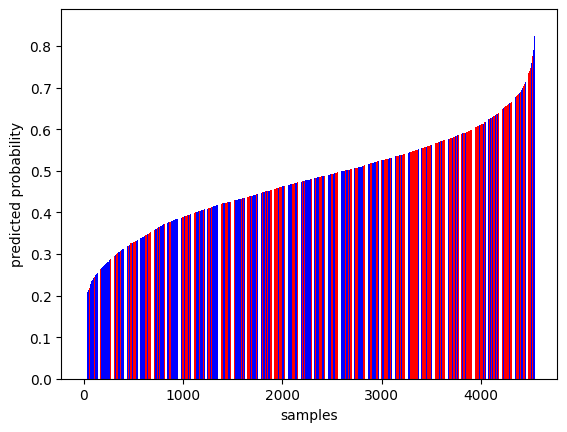

In [184]:
#Get the probabilities and the true labels in the corresponding order
sorted_indices = np.argsort(y_pred_prob[:, 0])
sorted_probabilities = y_pred_prob[sorted_indices]
sorted_labels = y_test.values[sorted_indices]

#Assign colors based on true values (0 or 1)
colors = ['blue' if label == 0 else 'red' for label in sorted_labels]
plt.bar(range(len(sorted_probabilities)), sorted_probabilities[:, 0], color=colors)
plt.xlabel('samples')
plt.ylabel('predicted probability')

plt.show()